Yichuan Philip Ma

CS506 Project

BPDA Brazilian Census Team 2

Visualizations for Brazilians in Massachusetts and the US by Marital Status

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data

In [46]:
import os

directory = 'MaritalStatus'
if not os.path.exists(directory):
    os.makedirs(directory)

MA state code is 25.

Marital Status data is in rows 20-24 for each year.

In [9]:
start = 20
end = 24
ms = extract_data(start, end)
ms.to_csv(f"{directory}/Marital Status 2012-2019.csv")

In [50]:
ms_MA_all = []
ms_national_all = []
years = list(range(2012, 2019+1))
labels = list(ms['State Code'].drop_duplicates())
for year in years:
    ms_year = ms[ms['Year'] == year]
    ms_MA_year = [year]
    ms_national_year = [year]
    for i in range(end - start + 1):
        ms_MA_year.append(ms_year[25].iloc[i])
        ms_national_year.append(sum(ms_year.iloc[i,3:]))
    ms_MA_all.append(ms_MA_year)
    ms_national_all.append(ms_national_year)

The following stacked bar chart shows the change in marital status of Brazilians in Massachusetts between 2012-2019.

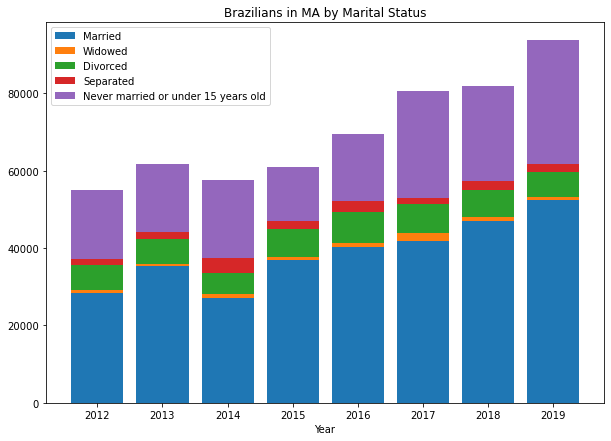

In [47]:
ms_MA_all = np.array(ms_MA_all)
fig, ax = plt.subplots(figsize = (10, 7))
bottom = np.zeros(len(years))
for i in range(end - start + 1):
    values = ms_MA_all[:,i+1]
    ax.bar(years, values, label=labels[i], bottom=bottom)
    bottom += values
ax.set_xlabel('Year')
ax.set_title('Brazilians in MA by Marital Status')
ax.legend()
plt.savefig(f"{directory}/BR_MS_Mass_since2012.png")
plt.show()

The following stacked bar chart shows the change in marital status of Brazilians nationwide between 2012-2019.

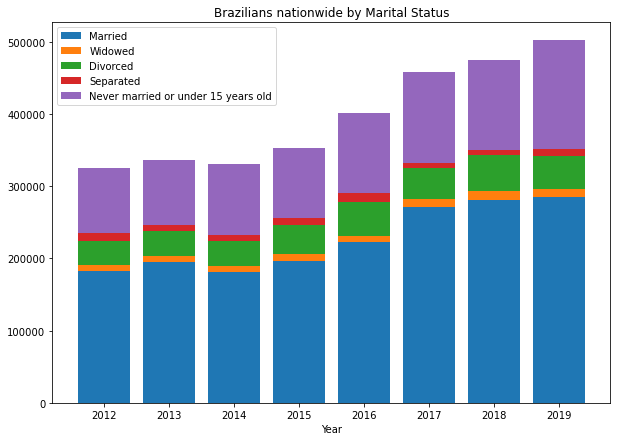

In [51]:
ms_national_all = np.array(ms_national_all)
fig, ax = plt.subplots(figsize = (10, 7))
bottom = np.zeros(len(years))
for i in range(end - start + 1):
    values = ms_national_all[:,i+1]
    ax.bar(years, values, label=labels[i], bottom=bottom)
    bottom += values
ax.set_xlabel('Year')
ax.set_title('Brazilians nationwide by Marital Status')
ax.legend()
plt.savefig(f"{directory}/BR_MS_national_since2012.png")
plt.show()